In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def find_irrelevant_rows(file_name):
    file = open(file_name, "r")
    i = 0
    res = [0,1]
    for line in file.readlines():
        if line[0] == "?":
            res.append(i)
        i += 1
    file.close()
    return res

In [4]:
names = ["rows", "tot_costs", "exec_time", "exec_time_cs", "plan_time", "ncond", "nind", "stmt"]

In [5]:
no_rls = pd.read_csv("V0/no_rls_stmts_out.csv", delimiter="|", 
                     header = None, names=names, skiprows=find_irrelevant_rows("V0/no_rls_stmts_out.csv"))
no_rls["nattr"] = no_rls["ncond"]

In [14]:
stage_acta = pd.read_csv("V1/rls_stage_acta_out.csv", delimiter="|", 
                         header = None, names=names, skiprows=find_irrelevant_rows("V1/rls_stage_acta_out.csv"))
stage_acta["nattr"] = stage_acta["ncond"]+2

acta_tenant = pd.read_csv("V2/rls_acta_tenant_out.csv", delimiter="|", 
                          header = None, names=names, skiprows=find_irrelevant_rows("V2/rls_acta_tenant_out.csv"))
acta_tenant["nattr"] = acta_tenant["ncond"]+2

ten_ct_acta_stage = pd.read_csv("V3/rls_tenant_casetype_acta_stages_out.csv", delimiter="|", 
            header = None, names=names, skiprows=find_irrelevant_rows("V3/rls_tenant_casetype_acta_stages_out.csv"))
ten_ct_acta_stage["nattr"] = ten_ct_acta_stage["ncond"]+4

full_rls = pd.read_csv("V4/full_rls_out.csv", delimiter="|", 
            header = None, names=names, skiprows=find_irrelevant_rows("V4/full_rls_out.csv"))
full_rls["nattr"] = full_rls["ncond"]+7

In [7]:
def plot_exec_time(df: pd.DataFrame, plot_title: str, log=True, figsize=(13, 8)):
    agg = df.groupby(["nattr", "nind"]).sum().unstack()
#    print("SUMMED DATA")
#    print(agg[["rows", "exec_time"]])
    agg = agg.exec_time/agg.rows
    print("TABLE WITH EXCECUTION TIMES")
    print(agg)
    to_plot = agg.dropna(how="all", axis = 1)
    plt.figure(figsize=figsize)
    if log:
        plt.yscale('log')
    plt.ylabel("Avg. Execution Time per 1 row (ms)")
    plt.xlabel('Number of Filtering Attributes')
    for col in to_plot.columns:
        plt.scatter(to_plot.index, to_plot[col])
        plt.plot(to_plot.index, to_plot[col], label=str(col)+" indx")
    plt.title(plot_title)
    plt.legend()
    

TABLE WITH EXCECUTION TIMES
nind           0         1         2         3         4
nattr                                                   
0       0.000136  0.000123  0.000154  0.000140  0.000161
1       0.001480  0.001485  0.001274  0.000806  0.000616
2       0.023391  0.006770  0.006517  0.006980  0.006996
3       0.114384  0.030937  0.031083  0.032405  0.032395
4       0.561341  0.149583  0.149102  0.156671  0.157315
5       2.161229  0.548740  0.552427  0.430490  0.431354
6      12.917750  3.310500  3.301062  2.399875  2.426813
7      30.744429  7.666714  7.655714  5.529000  5.516714


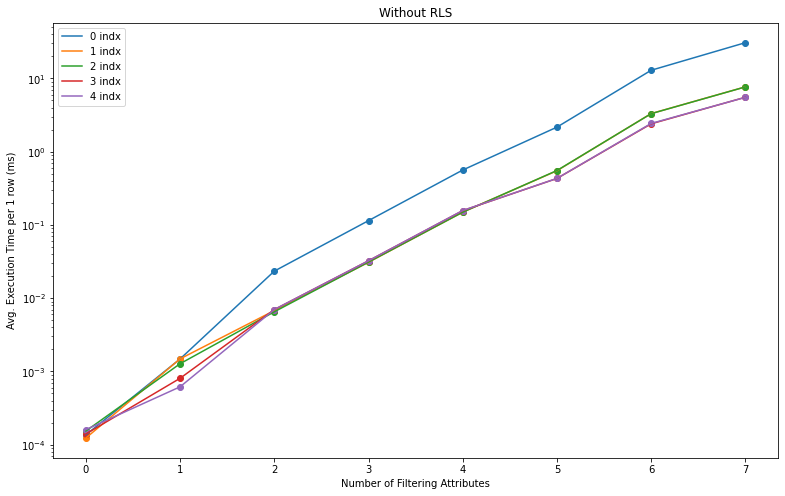

In [8]:
plot_exec_time(no_rls, "Without RLS")

TABLE WITH EXCECUTION TIMES
nind           0         1         2         3         4
nattr                                                   
2       0.029346  0.006837  0.005803  0.006283  0.006275
3       0.148267  0.026406  0.026350  0.026424  0.027793
4       0.519463  0.192744  0.193207  0.194341  0.190902
5       2.082813  0.798250  0.820450  0.801650  0.793600
6       8.482786  3.992250  4.032250  4.062750  3.983750
7      23.871800  4.183750  3.996000  4.046000  4.098750


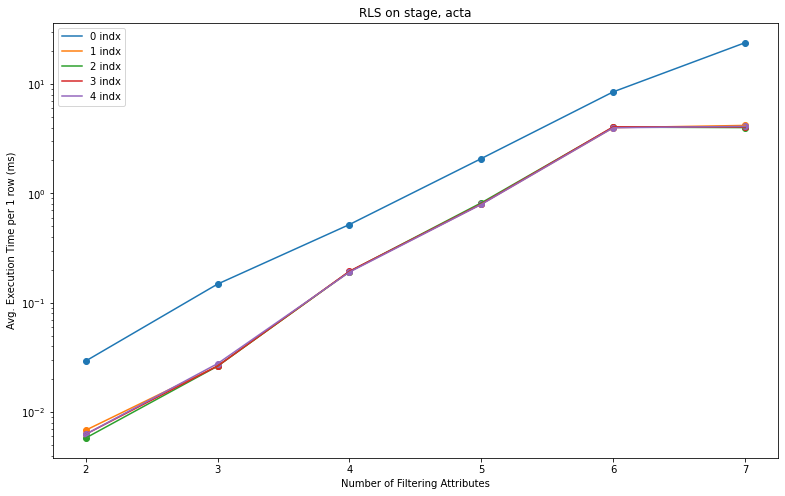

In [9]:
plot_exec_time(stage_acta, "RLS on stage, acta")

TABLE WITH EXCECUTION TIMES
nind           0         1         3         4
nattr                                         
2       0.047407  0.014198  0.010950  0.013638
3       0.235530  0.046145  0.046633  0.046289
4       0.986000  0.218043  0.109557  0.104714
5       4.009158  0.870444  0.402056  0.392944
6      19.171750  3.924750  1.784250  1.768500
7      38.831000       inf       inf       inf


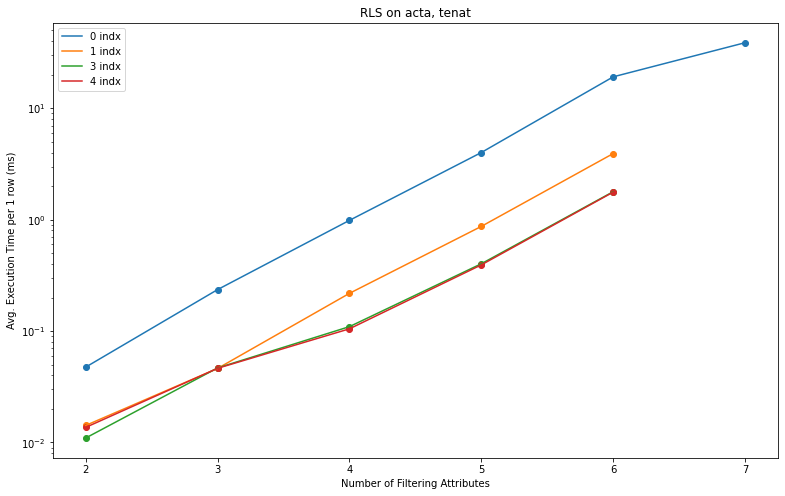

In [11]:
plot_exec_time(acta_tenant, "RLS on acta, tenat")

TABLE WITH EXCECUTION TIMES
nind           0          1          2           3          4          5  \
nattr                                                                      
4       0.982689   1.077118   0.935244    0.922024   0.185805   0.217809   
5       3.584705   3.427690   3.427103    3.516690   0.786103   0.739638   
6      26.172250  32.109833  32.040500   32.586500   6.360333   6.382000   
7      39.816000  97.891500  98.552500  100.075000  19.576000  19.292500   

nind           6          7  
nattr                        
4       0.110220   0.102390  
5       0.495276   0.417103  
6       3.479667   3.498333  
7      12.450000  10.419000  


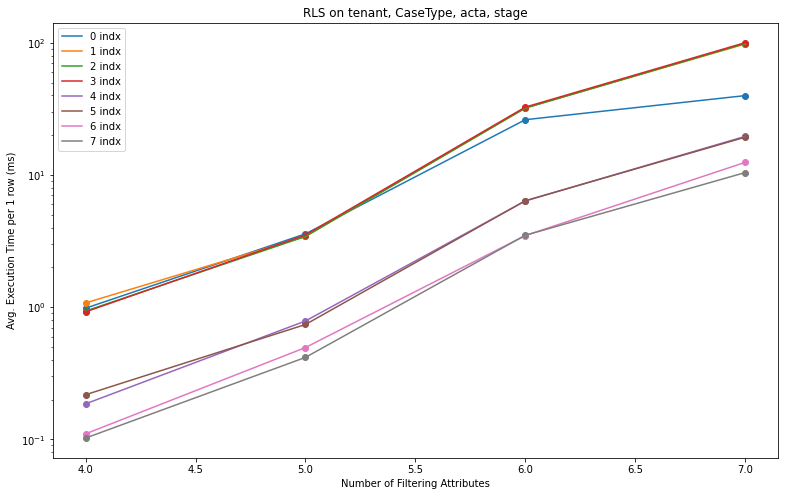

In [15]:
plot_exec_time(ten_ct_acta_stage, "RLS on tenant, CaseType, acta, stage")

TABLE WITH EXCECUTION TIMES
nind           0         1         2         3      4         5         6  \
nattr                                                                       
7      14.248222  3.129778  2.946222  1.395444  1.862  1.611889  1.784222   

nind          7  
nattr            
7      1.920111  


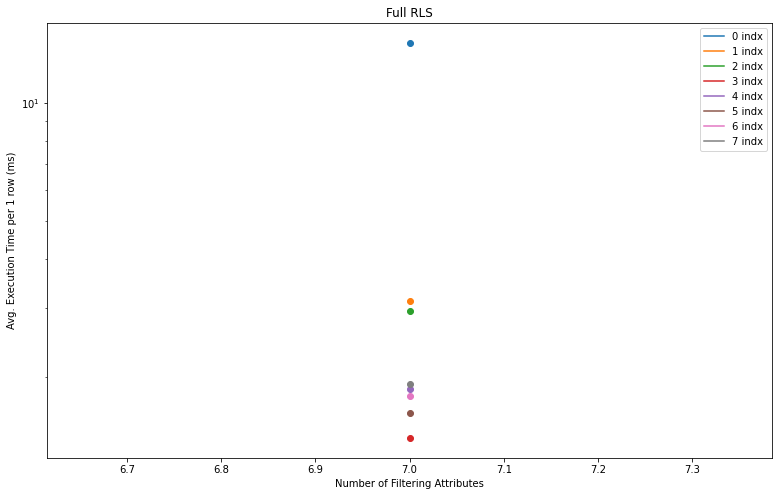

In [13]:
plot_exec_time(full_rls, "Full RLS")